In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
# Load Preprocessed Data
df = pd.read_csv("C:/Users/Rishitha.G/Downloads/preprocessed_diabetes_data.csv")

In [5]:
# Define Features (X) and Target (y)
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# 1.LOGISTIC REGRESSION

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train Logistic Regression Model
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [12]:
# Predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [14]:
print("\n===== Logistic Regression =====")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


===== Logistic Regression =====
Accuracy: 0.8890
Recall Score: 0.8941
Precision: 0.4268
F1 Score: 0.5778
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



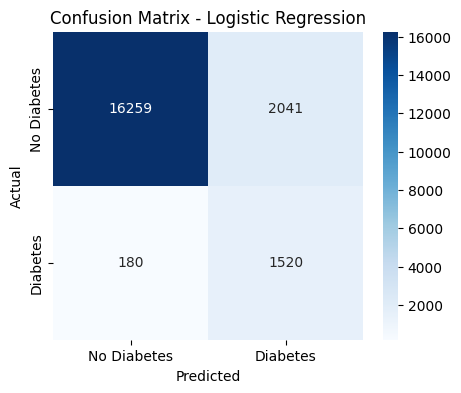

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 2.Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [21]:
# Evaluation
print("\n===== Random Forest =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


===== Random Forest =====
Accuracy: 0.9695
Recall Score: 0.6859
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



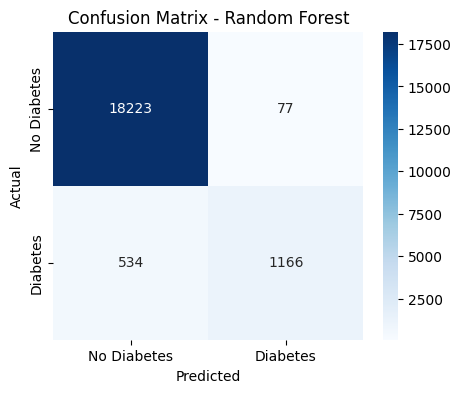

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 3. XGBoost

In [22]:
from xgboost import XGBClassifier

In [23]:
# Train XGBoost Model
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=2)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


C:\Users\Rishitha.G\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [13:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
# Evaluation
print("\n===== XGBoost =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


===== XGBoost =====
Accuracy: 0.9664
Recall Score: 0.7282
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18300
           1       0.85      0.73      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.91      0.86      0.88     20000
weighted avg       0.96      0.97      0.97     20000



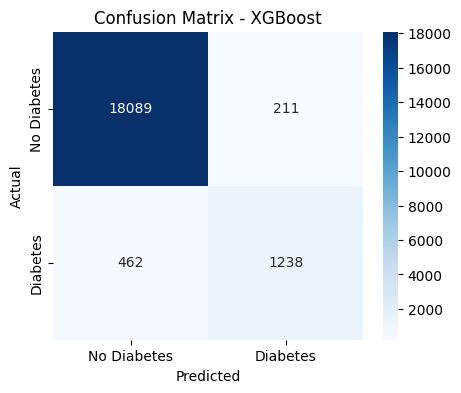

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# 4.Neural Network (MLP)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
# Train Neural Network Model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluation
print("\n===== Neural Network (MLP) =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


===== Neural Network (MLP) =====
Accuracy: 0.9714
Recall Score: 0.6924
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.96      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



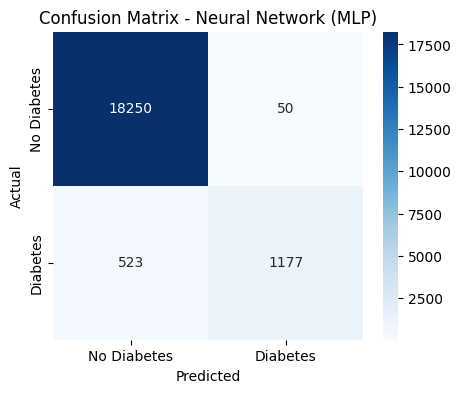

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network (MLP)")
plt.show()

# 5.Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC

In [ ]:
# Train SVM Model
model = SVC(kernel="linear", class_weight="balanced", probability=True)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print("\n===== SVM =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))